In [1]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [12]:
mountain_path = "../data/GlobalMountainsK3Binary/k1binary.tif"
mt_ds = rxr.open_rasterio(mountain_path)
mt_ds

<xarray.DataArray (band: 1, y: 21600, x: 43200)>
[933120000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * y            (y) float64 90.01 90.0 90.0 89.99 ... -89.96 -89.97 -89.98
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  0
    STATISTICS_MAXIMUM:      1
    STATISTICS_MEAN:         1
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0
    _FillValue:              0
    scale_factor:            1.0
    add_offset:              0.0

In [15]:
dis_path = "../data/HydroRIVERS_v10_shp/raster/global_reduced_HydroRIVERS_v10.tif"
dis_ds = rxr.open_rasterio(dis_path)
dis_ds.sum()

<xarray.DataArray ()>
array(137711, dtype=uint64)
Coordinates:
    spatial_ref  int64 0

In [18]:
# Define the latitude threshold for the Antarctic region
antarctic_lat_threshold = -60.0

# Create a mask for the Antarctic region
antarctic_mask = dis_ds['y'] < antarctic_lat_threshold

# Replace values in the Antarctic region with zeros using the mask
dis_ds = dis_ds.where(~antarctic_mask, 1)
dis_ds.sum()

<xarray.DataArray ()>
array(1217711, dtype=uint64)
Coordinates:
    spatial_ref  int64 0

In [19]:
def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

In [20]:
print("Original Raster:\n----------------\n")
print_raster(mt_ds)
print("Raster to Match:\n----------------\n")
print_raster(dis_ds)

Original Raster:
----------------

shape: (21600, 43200)
resolution: (0.008333333, -0.008333333)
bounds: (-179.999992654, -89.983346888, 179.999992946, 90.016645912)
sum: 105796489
CRS: EPSG:4326

Raster to Match:
----------------

shape: (1800, 3600)
resolution: (0.099999996, -0.099999996)
bounds: (-179.999992654, -89.983346888, 179.999992946, 90.016645912)
sum: 1217711
CRS: EPSG:4326



In [21]:
mt_match =mt_ds.rio.reproject_match(dis_ds)

In [22]:
print("Original Raster:\n----------------\n")
print_raster(dis_ds)
print("Raster to Match:\n----------------\n")
print_raster(mt_match)

Original Raster:
----------------

shape: (1800, 3600)
resolution: (0.099999996, -0.099999996)
bounds: (-179.999992654, -89.983346888, 179.999992946, 90.016645912)
sum: 1217711
CRS: EPSG:4326

Raster to Match:
----------------

shape: (1800, 3600)
resolution: (0.099999996, -0.099999996)
bounds: (-179.999992654, -89.983346888, 179.999992946, 90.016645912)
sum: 734091
CRS: EPSG:4326



In [23]:
mt_match

<xarray.DataArray (band: 1, y: 1800, x: 3600)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
Coordinates:
  * x            (x) float64 -179.9 -179.8 -179.7 -179.6 ... 179.7 179.8 179.9
  * y            (y) float64 89.97 89.87 89.77 89.67 ... -89.73 -89.83 -89.93
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  0
    STATISTICS_MAXIMUM:      1
    STATISTICS_MEAN:         1
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0
    scale_factor:            1.0
    add_offset:              0.0
    _FillValue:              0

In [24]:
dis_ds_invert = dis_ds - 1

In [25]:
# Create a new raster array where the value is 1 for mountain regions with non-zero discharge
mt_dis = np.logical_and(mt_match, dis_ds_invert)

In [26]:
mt_dis

<xarray.DataArray (band: 1, y: 1800, x: 3600)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * x            (x) float64 -179.9 -179.8 -179.7 -179.6 ... 179.7 179.8 179.9
  * y            (y) float64 89.97 89.87 89.77 89.67 ... -89.73 -89.83 -89.93
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  0
    STATISTICS_MAXIMUM:      1
    STATISTICS_MEAN:         1
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0
    scale_factor:            1.0
    add_offset:              0.0
    _FillValue:              0

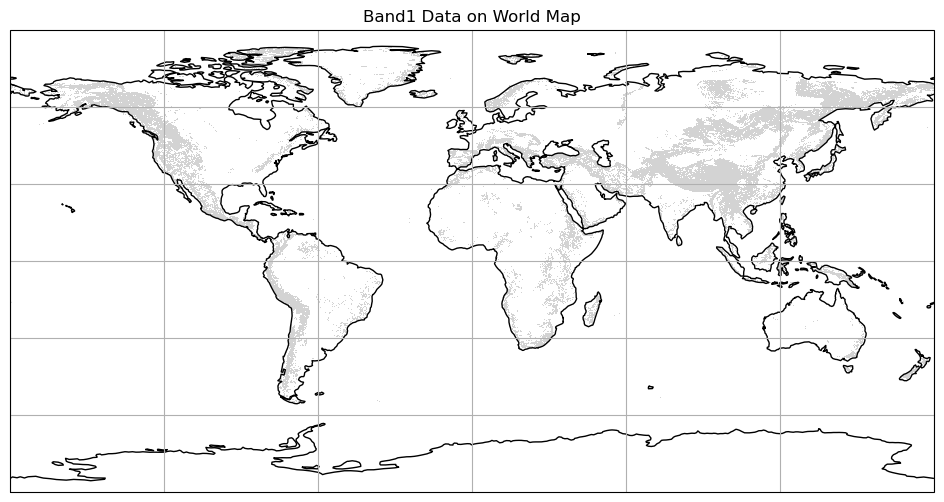

In [27]:
# Load the NetCDF file with 'Band1' data variable
dataset=mt_dis

# Create a custom colormap with lightgrey for 0 and None (transparent) for 1
cmap = plt.cm.colors.ListedColormap(['None', 'lightgrey'])

# Create a figure and subplot with PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))

# Plot the 'Band1' data variable with the custom colormap
dataset.plot(ax=ax, cmap=cmap, add_colorbar=False)

# Set the plot extent to cover the entire world
ax.set_global()

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()

# Set plot title and labels
ax.set_title('Band1 Data on World Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [28]:
mt_dis

<xarray.DataArray (band: 1, y: 1800, x: 3600)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * x            (x) float64 -179.9 -179.8 -179.7 -179.6 ... 179.7 179.8 179.9
  * y            (y) float64 89.97 89.87 89.77 89.67 ... -89.73 -89.83 -89.93
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  0
    STATISTICS_MAXIMUM:      1
    STATISTICS_MEAN:         1
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0
    scale_factor:            1.0
    add_offset:              0.0
    _FillValue:              0

In [29]:
mt_dis = mt_dis * 1
mt_dis

<xarray.DataArray (band: 1, y: 1800, x: 3600)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * x            (x) float64 -179.9 -179.8 -179.7 -179.6 ... 179.7 179.8 179.9
  * y            (y) float64 89.97 89.87 89.77 89.67 ... -89.73 -89.83 -89.93
  * band         (band) int64 1
    spatial_ref  int64 0

In [30]:
# Save the resampled dataset to a new NetCDF file
mt_dis_ds = mt_dis.to_dataset(name="AGregions")
mt_dis_ds

<xarray.Dataset>
Dimensions:      (x: 3600, y: 1800, band: 1)
Coordinates:
  * x            (x) float64 -179.9 -179.8 -179.7 -179.6 ... 179.7 179.8 179.9
  * y            (y) float64 89.97 89.87 89.77 89.67 ... -89.73 -89.83 -89.93
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    AGregions    (band, y, x) int64 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0

In [31]:
mt_dis_ds.AGregions

<xarray.DataArray 'AGregions' (band: 1, y: 1800, x: 3600)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * x            (x) float64 -179.9 -179.8 -179.7 -179.6 ... 179.7 179.8 179.9
  * y            (y) float64 89.97 89.87 89.77 89.67 ... -89.73 -89.83 -89.93
  * band         (band) int64 1
    spatial_ref  int64 0

In [33]:
# Save the resampled dataset to a new NetCDF file
mt_dis_ds.to_netcdf('../output/mt+dis.nc')